<a href="https://colab.research.google.com/github/yoshitha05/AD/blob/main/All_NLP_Tasks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Word Tokenization

In [ ]:
import nltk
import spacy

text = "Hello! How are you? I am learning NLP. Welcome to U.S.A. "

nlp = spacy.load("en_core_web_sm")
doc = nlp(text)
spacy_tokens = [token.text for token in doc]

# print("Word Tokens:", word_tokens)
# print("Sentence Tokens:", sent_tokens)
print("SpaCy Tokens:", spacy_tokens)

SpaCy Tokens: ['Hello', '!', 'How', 'are', 'you', '?', 'I', 'am', 'learning', 'NLP', '.', 'Welcome', 'to', 'U.S.A.']


### Stop word removal

In [ ]:

spacy_stopwords = [token.text for token in doc if not token.is_stop]

print("SpaCy Filtered Words:", spacy_stopwords)

SpaCy Filtered Words: ['Hello', '!', '?', 'learning', 'NLP', '.', 'Welcome', 'U.S.A.']


### Lemmatization

In [ ]:
# converts into root words based on given sentence
lemmatized_words = [token.lemma_ for token in doc]

print("Lemmatized Words:", lemmatized_words)

Lemmatized Words: ['hello', '!', 'how', 'be', 'you', '?', 'I', 'be', 'learn', 'NLP', '.', 'welcome', 'to', 'U.S.A.']


### Lower casr and Remove Punctuations

In [ ]:
# regex101.com - refer this website to get the sytax for any function

import re

text = "Hello!! This is NLP 101. Visit https://example.com"
cleaned_text = re.sub(r'[^a-zA-Z\s]', '', text)  # Remove non-alphabetic characters
lower_text = cleaned_text.lower()

print("Cleaned Text:", lower_text)


Cleaned Text: hello this is nlp  visit httpsexamplecom


### parts of Speech

In [ ]:
# When we perform pos, we should make sure that we must not do any preprocessing techniques

for token in doc:
    print(f"{token.text} --> {token.pos_}")

Hello --> INTJ
! --> PUNCT
How --> SCONJ
are --> AUX
you --> PRON
? --> PUNCT
I --> PRON
am --> AUX
learning --> VERB
NLP --> PROPN
. --> PUNCT
Welcome --> VERB
to --> ADP
U.S.A. --> PROPN


### NER

In [ ]:
# used for getting entities in a project
# Using spacy/nltk/pipelines we can get NER

for ent in doc.ents:
    print(f"{ent.text} --> {ent.label_}")

NLP --> ORG
U.S.A. --> GPE


### Word2Vec Embeddings

In [ ]:
from gensim.models import Word2Vec
from gensim.test.utils import common_texts


# model = Word2Vec(sentences=common_texts, vector_size=2, window=5, min_count=1, workers=4)
model = Word2Vec(sentences=common_texts, vector_size=10, window=5, min_count=1, workers=4)


In [ ]:
common_texts

[['human', 'interface', 'computer'],
 ['survey', 'user', 'computer', 'system', 'response', 'time'],
 ['eps', 'user', 'interface', 'system'],
 ['system', 'human', 'system', 'eps'],
 ['user', 'response', 'time'],
 ['trees'],
 ['graph', 'trees'],
 ['graph', 'minors', 'trees'],
 ['graph', 'minors', 'survey']]

#### Embeddings for a word

In [ ]:
print("Vector for 'computer':", model.wv['computer'])
# print("Vector for 'computer':", model.wv['King'])

Vector for 'computer': [ 0.0163195   0.00189972  0.03474648  0.00217841  0.09621626  0.05062076
 -0.08919986 -0.0704361   0.00901718  0.06394394]


#### Most similar words

In [ ]:
print("Most similar words to 'computer':", model.wv.most_similar('eps'))

Most similar words to 'computer': [('computer', 0.2914133369922638), ('survey', 0.27556222677230835), ('minors', 0.24953821301460266), ('interface', 0.22391675412654877), ('user', 0.09277458488941193), ('response', -0.02176876738667488), ('time', -0.042645372450351715), ('human', -0.060954876244068146), ('trees', -0.15169012546539307), ('system', -0.2726021111011505)]


#### Visualizing closest words

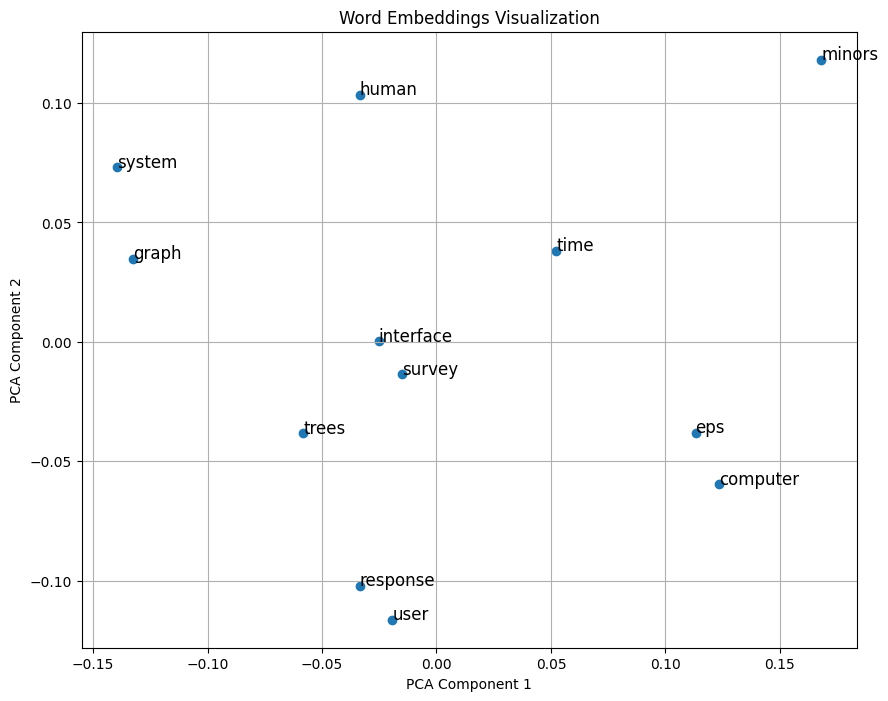

In [ ]:
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from gensim.models import Word2Vec
from sklearn.decomposition import PCA


word_vectors = model.wv[model.wv.index_to_key]  # Get the word vectors
pca = PCA(n_components=2)  # Initialize PCA
result = pca.fit_transform(word_vectors)  # Fit and transform the word vectors


plt.figure(figsize=(10, 8))
plt.scatter(result[:, 0], result[:, 1])


words = list(model.wv.index_to_key)
for i, word in enumerate(words):
    plt.annotate(word, xy=(result[i, 0], result[i, 1]), fontsize=12)

plt.title("Word Embeddings Visualization")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.grid()
plt.show()